In [1]:
import torch
# 사용안하면 run all cells하다가 마지막에 리스타트 오류남.
# CPU 에서 GPU 활성 하기
if torch.cuda.is_available():
    device = torch.device("cuda") # 목적지가 cuda device에 설정된다.
    print("CUDA(GPU)를 사용합니다.")
else:
    device = torch.device("cpu")
    print("CUDA(GPU)를 사용할 수 없으므로, cpu를 사용합니다.")

CUDA(GPU)를 사용합니다.


In [2]:
print('ks')

ks


In [3]:
# 4번나눠보기
## #@! 4번과 다른점 4. 데이터셋 분할 에서 X_train 가 중복 확인. #@!

In [4]:
#### 1. 패키지 사용

In [5]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
#### 2. 데이터 로드 및 독립 변수와 종속 변수 분리

In [7]:
# 데이터 로드
df = pd.read_csv('./encoded_data.csv')

# change_date 열을 제외한 나머지 열 선택
X = df.drop(columns=['change_date'])
y = df['change_date'].values # 예측값

C:\Users\user\AppData\Local\Temp\ipykernel_33092\2516417766.py:2: DtypeWarning: Columns (4,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./encoded_data.csv')


In [8]:
#len(df) 6476
#len(X.columns) # 291
#y # shape 6476

In [9]:
#### 3. 결측값 처리

In [10]:
# 결측값 처리 (예: 평균값으로 대체)
X.replace('-', np.nan, inplace=True)
X = X.astype(np.float32)
X.fillna(X.mean(), inplace=True)

y = y.astype(np.float32)

In [11]:
#### 4. 데이터셋 분할

In [12]:
# train/test 데이터셋 나누기 (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# train/val 데이터셋 나누기 (80% train, 20% val)
X_sub, X_val, y_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

In [34]:
# 1) train/test 데이터셋 나누기 row 갯수 확인
# len(X_train) # len값 X_train 5180 
# len(X_test) # X_test 1296 
# len(y_train) # len값 y_train 5180 
# len(y_test) # y_test 1296 

# 2) train에서 X y _sub X y _val 데이터셋 나누기 row 갯수 확인
# len(X_sub) # len값 X_sub 4144 
# len(X_val) # X_val 1036 
# len(y_sub) # len값 y_sub (test) 4144 
# len(y_val) # y_val 1036 
# y_sub + y_val = 5180 확인 완료.

#len(X.columns) # 291
#y # shape 6476
#y_test = 

1036

In [14]:
#### 5. 모델 생성

In [15]:
# Sequential 모델 생성
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_dim=X.shape[1], activation='relu'), # 입력계층 특성 수를 자동으로 설정 # X.shape[1] = 219
    tf.keras.layers.Dense(64, activation='relu'), # 은닉계층1
    tf.keras.layers.Dense(32, activation='relu'), # 은닉계층2
    tf.keras.layers.Dense(16, activation='relu'), # 은닉계층3
    tf.keras.layers.Dense(1, activation='linear') # 출력계층   activation linear 사용 #@!
])

In [16]:
#### 6. 모델 컴파일

In [17]:
# 회귀를 위한 손실 함수(mean squared error)와 메트릭스(mean absolute error) 사용하여 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

In [18]:
#### 7. 모델 정보 확인

In [19]:
# 모델 정보(요약) 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               37376     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 48,257
Trainable params: 48,257
Non-trainable params: 0
_________________________________________________________________


In [20]:
#### 8. 시드값 설정 및 tensorflow numpy 랜덤

In [21]:
# 시드 값 설정
seed = 123
tf.random.set_seed(seed)
np.random.seed(seed)

In [22]:
#### 9. 모델 학습

In [23]:
# 모델 학습
history = model.fit(X_sub, y_sub, validation_data=(X_val, y_val), epochs=100, batch_size=100)

Epoch 1/100
42/42 [==============================] - 1s 5ms/step - loss: 16.8392 - mean_absolute_error: 2.8333 - val_loss: 1.5439 - val_mean_absolute_error: 0.9162
Epoch 2/100
42/42 [==============================] - 0s 2ms/step - loss: 0.8186 - mean_absolute_error: 0.6698 - val_loss: 0.5657 - val_mean_absolute_error: 0.5033
Epoch 3/100
42/42 [==============================] - 0s 2ms/step - loss: 0.4494 - mean_absolute_error: 0.4758 - val_loss: 0.3736 - val_mean_absolute_error: 0.4146
Epoch 4/100
42/42 [==============================] - 0s 2ms/step - loss: 0.3168 - mean_absolute_error: 0.3934 - val_loss: 0.2672 - val_mean_absolute_error: 0.3613
Epoch 5/100
42/42 [==============================] - 0s 2ms/step - loss: 0.2414 - mean_absolute_error: 0.3356 - val_loss: 0.2043 - val_mean_absolute_error: 0.2982
Epoch 6/100
42/42 [==============================] - 0s 2ms/step - loss: 0.1850 - mean_absolute_error: 0.2814 - val_loss: 0.1689 - val_mean_absolute_error: 0.2769
Epoch 7/100
42/42 [==

In [24]:
#### 10. 학습 결과 시각화:

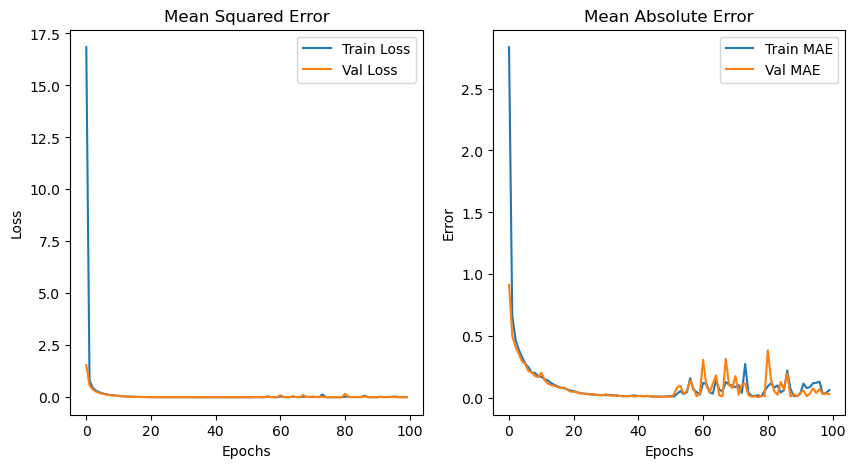

In [25]:
# 학습 결과 시각화
plt.figure(figsize=(10, 5))

# subplot 1: Mean Squared Error 손실 함수의 변화
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# subplot 2: Mean Absolute Error 매트릭스의 변화
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Val MAE')
plt.title('Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()

plt.show()

In [35]:
# 손실 함수와 평균 절대 오차 값을 가져오기
loss_values = history.history['loss']
mean_absolute_error_values = history.history['mean_absolute_error']
mean_absolute_error_values = history.history['mean_absolute_error'] # 결정계수 r^2 

# 에포크 수
epochs = len(loss_values)

# 결과 출력
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}: Loss (MSE) = {loss_values[epoch]:.4f}, MAE = {mean_absolute_error_values[epoch]:.4f}")

Epoch 1: Loss (MSE) = 16.8392, MAE = 2.8333
Epoch 2: Loss (MSE) = 0.8186, MAE = 0.6698
Epoch 3: Loss (MSE) = 0.4494, MAE = 0.4758
Epoch 4: Loss (MSE) = 0.3168, MAE = 0.3934
Epoch 5: Loss (MSE) = 0.2414, MAE = 0.3356
Epoch 6: Loss (MSE) = 0.1850, MAE = 0.2814
Epoch 7: Loss (MSE) = 0.1523, MAE = 0.2495
Epoch 8: Loss (MSE) = 0.1166, MAE = 0.2066
Epoch 9: Loss (MSE) = 0.1016, MAE = 0.2053
Epoch 10: Loss (MSE) = 0.0793, MAE = 0.1788
Epoch 11: Loss (MSE) = 0.0672, MAE = 0.1738
Epoch 12: Loss (MSE) = 0.0526, MAE = 0.1542
Epoch 13: Loss (MSE) = 0.0429, MAE = 0.1439
Epoch 14: Loss (MSE) = 0.0331, MAE = 0.1239
Epoch 15: Loss (MSE) = 0.0250, MAE = 0.1084
Epoch 16: Loss (MSE) = 0.0196, MAE = 0.0962
Epoch 17: Loss (MSE) = 0.0151, MAE = 0.0859
Epoch 18: Loss (MSE) = 0.0122, MAE = 0.0802
Epoch 19: Loss (MSE) = 0.0096, MAE = 0.0721
Epoch 20: Loss (MSE) = 0.0072, MAE = 0.0628
Epoch 21: Loss (MSE) = 0.0059, MAE = 0.0587
Epoch 22: Loss (MSE) = 0.0044, MAE = 0.0495
Epoch 23: Loss (MSE) = 0.0033, MAE = 0.0

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 예측값 생성
predictions = model.predict(X_val)

# 결정계수 (R²) 계산
r2 = r2_score(y_val, predictions)
print(f"결정계수 (R²): {r2:.4f}")

# Mean Absolute Error (MAE) 계산
mae = mean_absolute_error(y_val, predictions)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Mean Absolute Percentage Error (MAPE) 계산
mape = np.mean(np.abs((y_val - predictions) / y_val)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")

# Root Mean Squared Error (RMSE) 계산
rmse = np.sqrt(mean_squared_error(y_val, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Mean Bias Deviation (MBD) 계산
mbd = np.mean(predictions - y_val)
print(f"Mean Bias Deviation (MBD): {mbd:.4f}")

# Adjusted R² 계산
n = len(y_val)  # 샘플 수
p = X_val.shape[1]  # 독립 변수 수
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R²: {adjusted_r2:.4f}")

33/33 [==============================] - 0s 917us/step
결정계수 (R²): 0.9999
Mean Absolute Error (MAE): 0.0346
Mean Absolute Percentage Error (MAPE): 21.6240%
Root Mean Squared Error (RMSE): 0.0394
Mean Bias Deviation (MBD): 0.0344
Adjusted R²: 0.9999


In [ ]:
# scaled 
# train test로 확인
#,